In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r'C:\Users\Sai Chaturya\OneDrive\Desktop\fraud detection\PS_20174392719_1491204439457_log.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.shape

(6362620, 11)

In [8]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [9]:
type=df['type'].value_counts()

In [10]:
transactions=type.index

In [11]:
quantity=type.values

In [12]:
df = df.dropna()

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [14]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})

In [15]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [16]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [17]:
#df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,3,5],inplace=True)

In [18]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [19]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [20]:
df['type']=df['type'].map({'PAYMENT':1, 'TRANSFER':4, 'CASH_OUT':2, 'DEBIT':5, 'CASH_IN':3})

In [21]:
df['type'].value_counts()

2    2237500
1    2151495
3    1399284
4     532909
5      41432
Name: type, dtype: int64

In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,2,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [23]:
df['type'].unique()

array([1, 4, 2, 5, 3], dtype=int64)

In [24]:
df['type'].value_counts()

2    2237500
1    2151495
3    1399284
4     532909
5      41432
Name: type, dtype: int64

In [25]:
x=df[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [26]:
y=df.iloc[:,-2]

In [27]:
y

0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
6362615       Fraud
6362616       Fraud
6362617       Fraud
6362618       Fraud
6362619       Fraud
Name: isFraud, Length: 6362620, dtype: object

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model=LogisticRegression()

In [31]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
model.score(xtest,ytest)

0.9994758448563642

In [33]:
model.predict([[4,180,181,0]])

c:\Users\Sai Chaturya\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Fraud'], dtype=object)

In [34]:
model.predict([[1,233,44,222]])

c:\Users\Sai Chaturya\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No Fraud'], dtype=object)

In [35]:

# Debugging with Sample Data
sample_data = np.array([[1, 1000.0, 500.0, 800.0]])  # Use appropriate values for your features
debug_prediction = model.predict(sample_data)
print("Debugging prediction with sample data:", debug_prediction)




Debugging prediction with sample data: ['No Fraud']


c:\Users\Sai Chaturya\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



required_columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isflaggedfraud']

if all(col in df.columns for col in required_columns):
    # Your code to access the columns here
    input_data = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'isflaggedfraud']]
    y_true = df['isFraud'].values
    y_pred = model.predict(input_data)
    # Example: If you have probabilities, convert them to binary predictions
    y_pred = (model.predict_proba(input_data)[:, 1] > 0.5).astype(int)
    
    # Now you can compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

In [37]:
print(df['isFraud'].value_counts())


No Fraud    6354407
Fraud          8213
Name: isFraud, dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, X_test, y_train, y_test are your feature and label sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Convert string labels to binary (if needed)
y_test_binary = (y_test == 'Fraud').astype(int)
y_pred_binary = (y_pred == 'Fraud').astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Accuracy: 0.9994758448563642, Precision: 0.7145429986492571, Recall: 0.9796296296296296, F1 Score: 0.8263473053892215


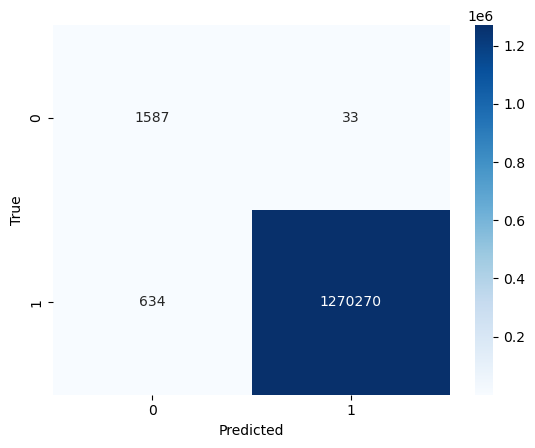

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




In [40]:
import pickle

# Assuming you have a trained model named 'your_model'
# your_model = ...  # Replace this with your actual model

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Now, your_model is saved in 'your_model.pkl' file


In [41]:
# Load the model from the file
with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now, 'loaded_model' contains your previously trained model


In [45]:
import pickle

# Assuming you have a trained model named 'your_model'
# your_model = ...  # Replace this with your actual model

# Save the model to a file
with open('encoder.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Now, your_model is saved in 'your_model.pkl' file

In [46]:
# Load the model from the file
with open('encoder.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now, 'loaded_model' contains your previously trained model

In [42]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have already trained the logistic regression model and assigned it to logistic_regression_model

# Get predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Convert true labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y_true_encoded = label_encoder.fit_transform(y_test)

# Example: Try threshold values from 0.1 to 0.9
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    y_pred_threshold = (y_probs > threshold).astype(int)
    accuracy = accuracy_score(y_true_encoded, y_pred_threshold)
    precision = precision_score(y_true_encoded, y_pred_threshold)
    recall = recall_score(y_true_encoded, y_pred_threshold)
    f1 = f1_score(y_true_encoded, y_pred_threshold)

    print(f"Threshold: {threshold}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")


Threshold: 0.1, Accuracy: 0.9988401004617594, Precision: 0.9988399691915937, Recall: 1.0, F1 Score: 0.9994196479826869
Threshold: 0.2, Accuracy: 0.9989171127617239, Precision: 0.9989169067863886, Recall: 1.0, F1 Score: 0.9994581599615601
Threshold: 0.3, Accuracy: 0.9990294878524885, Precision: 0.9990291941368042, Recall: 1.0, F1 Score: 0.9995143613379719
Threshold: 0.4, Accuracy: 0.9992118026850574, Precision: 0.9992122053140762, Recall: 0.9999992131585076, F1 Score: 0.999605554329877
Threshold: 0.5, Accuracy: 0.9994758448563642, Precision: 0.9999740219459452, Recall: 0.9995011424938469, F1 Score: 0.999737526301478
Threshold: 0.6, Accuracy: 0.9765552555393847, Precision: 0.9999750228017649, Recall: 0.9765497630033425, F1 Score: 0.9881235778468143
Threshold: 0.7, Accuracy: 0.9529942067890271, Precision: 0.9999744044915989, Recall: 0.9529586813795534, F1 Score: 0.9759006049022303
Threshold: 0.8, Accuracy: 0.9287746242899938, Precision: 0.9999737361585319, Recall: 0.9287082265851708, F1 S

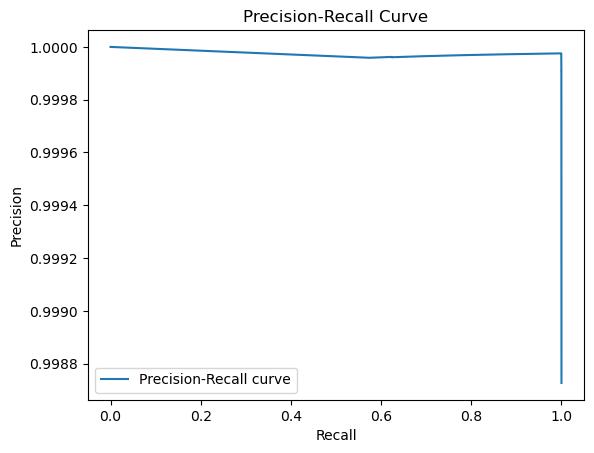

In [43]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_true_encoded, y_probs)

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
